## Singular value decomposition

* Unlike eigendecomposition which is applicable to square matrices onlym SVD is applicable to any real-valued matrix
* Decomposes matrix into:
    * singular vectors (analogous to eigenvectors)
    * singular values (analogous to eigrnvalues)
* For some matrix $A$, its SVD is $A = UDV^T$

Where: 

* $U$ is an orthogonal $m \times m$ matrix; its columns are the **left-singular vectors** of $A$.
* $V$ is an orthogonal $n \times n$ matrix; its columns are the **right-singular vectors** of $A$.
* $D$ is a diagonal $m \times n$ matrix; elements along its diagonal are the **singular values** of $A$.

In [14]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [15]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [16]:
# U: left singular vectors, d: singular values, VT: right singular vectors
# VT is already transposed
U, d, VT = np.linalg.svd(A) 

In [17]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [18]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [19]:
d

array([8.66918448, 4.10429538])

In [21]:
np.diag(d)

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

for $D$ we need have same dimensions as that of $A$ for us to use it in $A = UDV^T$ for matrix multiplication to be possible

In [26]:
D = np.concatenate((np.diag(d), np.zeros((1, 2))), axis=0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [27]:
np.dot(U, np.dot(D, VT))

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

SVD and eigendecomposition are closely related to each other: 

* Left-singular vectors of $A$ = eigenvectors of $AA^T$.
* Right-singular vectors of $A$ = eigenvectors of $A^TA$.
* Non-zero singular values of $A$ = square roots of eigenvalues of $AA^T$ = square roots of eigenvalues of $A^TA$

**Exercise**: Using the matrix `P` from the preceding PyTorch exercises, demonstrate that these three SVD-eigendecomposition equations are true. 

In [28]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [31]:
U, d, VT = torch.svd(P)
U, d, VT

(tensor([[-0.9757,  0.1823,  0.1214],
         [-0.0975,  0.1350, -0.9860],
         [-0.1961, -0.9739, -0.1140]]),
 tensor([26.1632,  8.1875,  2.5395]),
 tensor([[-0.9810,  0.0113, -0.1937],
         [-0.1196, -0.8211,  0.5581],
         [ 0.1528, -0.5706, -0.8069]]))

In [40]:
PPT = torch.matmul(P, torch.transpose(P, 0, 1))

lambdas, V = torch.linalg.eig(PPT)
V


tensor([[ 0.9757+0.j,  0.1823+0.j,  0.1214+0.j],
        [ 0.0975+0.j,  0.1350+0.j, -0.9860+0.j],
        [ 0.1961+0.j, -0.9739+0.j, -0.1140+0.j]])

In [39]:
U

tensor([[-0.9757,  0.1823,  0.1214],
        [-0.0975,  0.1350, -0.9860],
        [-0.1961, -0.9739, -0.1140]])

In [41]:
PTP = torch.matmul(torch.transpose(P, 0, 1), P)

lambdas, V = torch.linalg.eig(PTP)
V

tensor([[ 0.9810+0.j,  0.1937+0.j, -0.0113+0.j],
        [ 0.1196+0.j, -0.5581+0.j,  0.8211+0.j],
        [-0.1528+0.j,  0.8069+0.j,  0.5706+0.j]])

In [43]:
U, d, VT = torch.svd(P)
VT

tensor([[-0.9810,  0.0113, -0.1937],
        [-0.1196, -0.8211,  0.5581],
        [ 0.1528, -0.5706, -0.8069]])

### Image Compression using SVD

In [44]:
from PIL import Image

In [46]:
! wget https://hips.hearstapps.com/hmg-prod/images/happy-dog-outdoors-royalty-free-image-1652927740.jpg

--2025-04-05 21:46:25--  https://hips.hearstapps.com/hmg-prod/images/happy-dog-outdoors-royalty-free-image-1652927740.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.160.155
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.160.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137084 (134K) [image/jpeg]
Saving to: ‘happy-dog-outdoors-royalty-free-image-1652927740.jpg’

happy-dog-outdoors- 100%[===================>] 133.87K  --.-KB/s    in 0.01s   

2025-04-05 21:46:25 (10.6 MB/s) - ‘happy-dog-outdoors-royalty-free-image-1652927740.jpg’ saved [137084/137084]



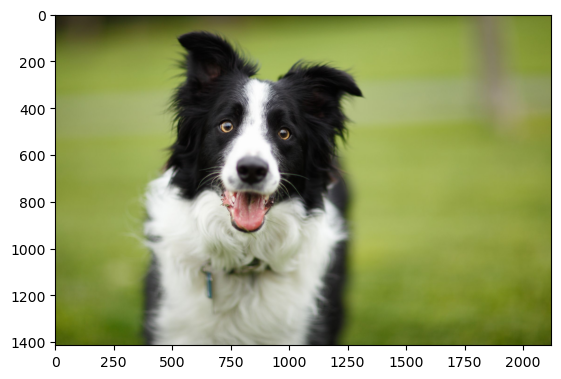

In [47]:
img = Image.open('happy-dog-outdoors-royalty-free-image-1652927740.jpg')
_ = plt.imshow(img)

Convert to geay scale - we dont have to work with complexity of multiple color channels

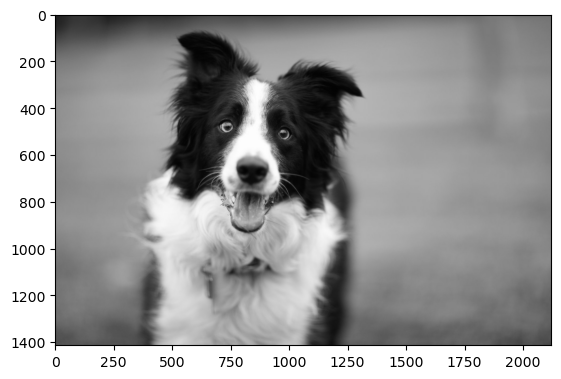

In [48]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

Convert data into numpy matrix, which does not impact image data

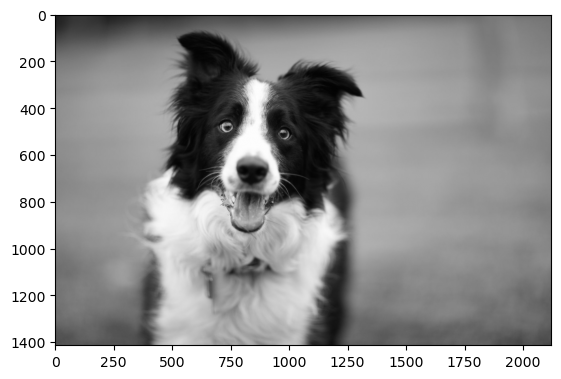

In [50]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (img.size[1], img.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')


Calculate SVD for the image

In [51]:
U, sigma, V = np.linalg.svd(imgmat)

As eigenvalues are arranged in descending order in diag($\lambda$) so too are singular values, by convention, arranged in descending order in $D$ (or, in this code, diag($\sigma$)). Thus, the first left-singular vector of $U$ and first right-singular vector of $V$ may represent the most prominent feature of the image: 

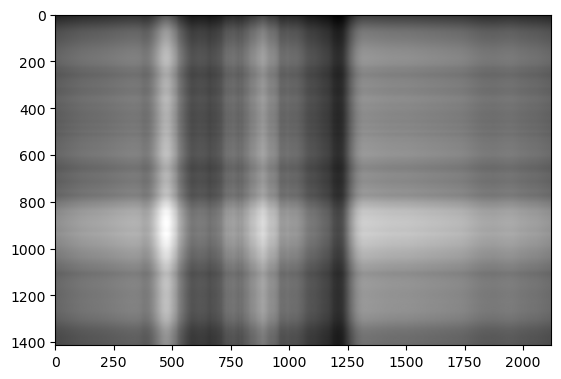

In [ ]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

Additional singular vectors improve the image quality:

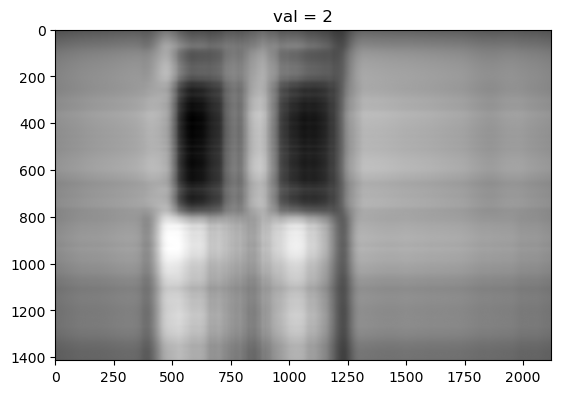

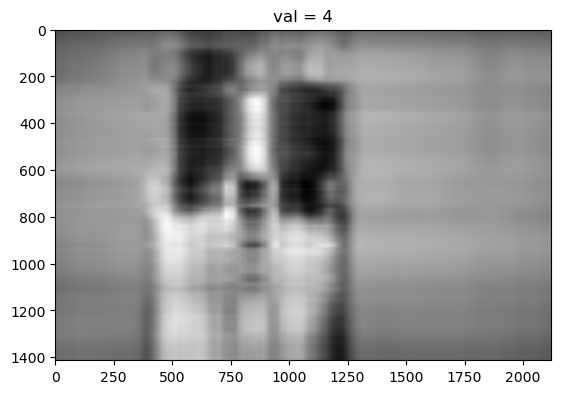

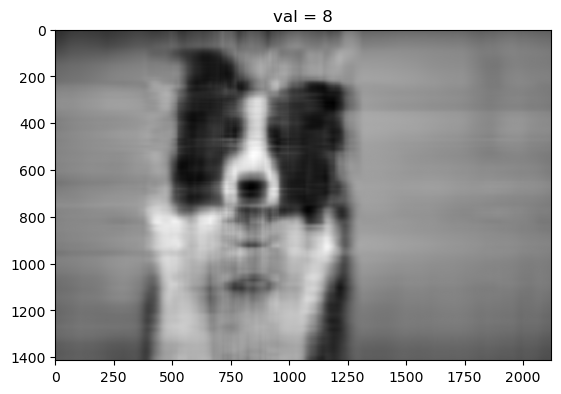

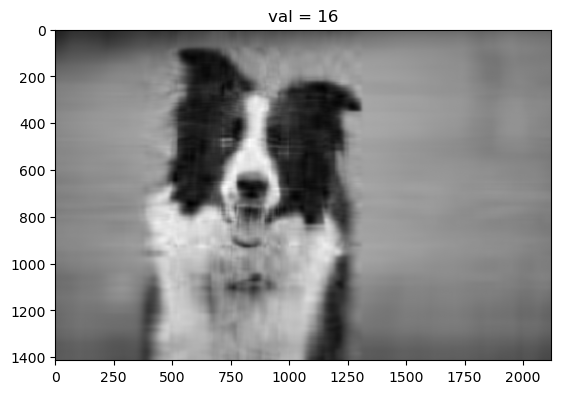

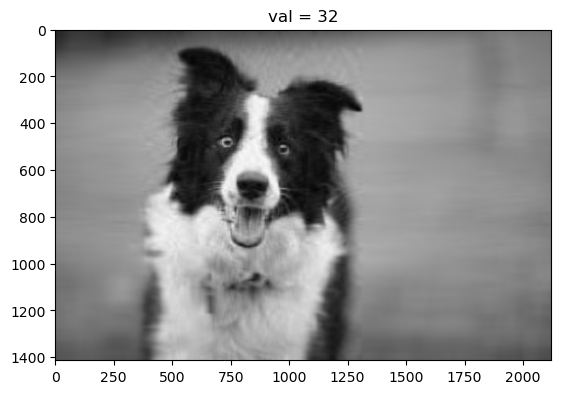

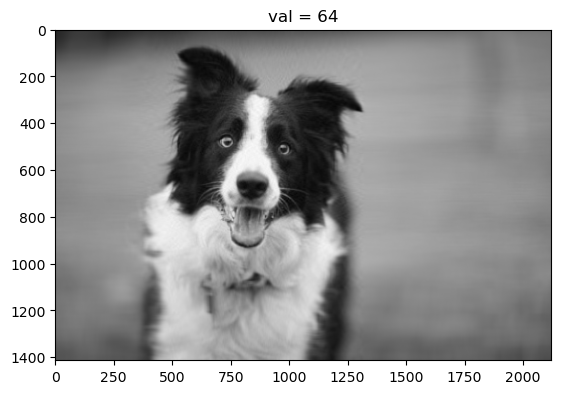

In [53]:
vals = [2, 4, 8, 16, 32, 64]

for val in vals:
    reconstimg = np.matrix(U[:, :val]) * np.diag(sigma[:val]) * np.matrix(V[:val, :])
    _ = plt.imshow(reconstimg, cmap='gray')
    title = 'val = ' + str(val)
    plt.title(title)
    plt.show()

With 64 singular vectors - the image is reconstructed quite well, however the data footpribt is much smaller than the original image:

In [54]:
imgmat.shape

(1414, 2121)

In [56]:
full_representation = 1414 * 2121
full_representation

2999094

In [57]:
svd64_reppresentation = 64 * 1414 + 64 + 64 * 2121
svd64_reppresentation

226304

In [58]:
svd64_reppresentation / full_representation

0.07545745481802171

Specifically, the image represented as 64 sigular vector is 7.5% of the size of the original!!

Alongside images, we can use sigular vectors for dramatic, lossy compression of other types of media files.